In [1]:
import pyfedwatch as fw
from pyfedwatch.datareader import read_price_history, get_fedfunds_range
from pyfedwatch.datareader import read_fomc_data, get_fomc_data
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\main.csv')

In [3]:
# Get FOMC meetings data

# Option 1: Use read_fomc_data and create a list
fomc_data_1 = read_fomc_data(path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\fomc')
fomc_dates_1 = fomc_data_1['FOMCDate'].to_list()

# Option 2: (Recommended) Use get_fomc_data and create a list
fomc_data_2 = get_fomc_data()
fomc_dates_2 = fomc_data_2[(fomc_data_2['Status'] == 'Scheduled') | (fomc_data_2['Status'] == 'Cancelled')].index.tolist()

In [4]:
df_fomc = fomc_data_1.copy()
fomc_data_1.head(25)

,FOMCDate,Time,Actual,Forecast,Previous
0,2024-12-18,13:00,NaN,NaN,NaN
1,2024-11-06,13:00,NaN,NaN,NaN
2,2024-09-25,13:00,NaN,NaN,NaN
3,2024-07-31,13:00,NaN,NaN,NaN
4,2024-06-19,13:00,NaN,NaN,NaN
5,2024-05-01,13:00,NaN,NaN,NaN
6,2024-03-20,13:00,NaN,NaN,NaN
7,2024-01-31,13:00,NaN,NaN,NaN
8,2023-12-13,13:00,NaN,NaN,NaN
9,2023-11-01,13:00,NaN,NaN,NaN


### Getting data out

In [5]:
df_fomc['FOMCDate'] = pd.to_datetime(df_fomc['FOMCDate'])

# Extract year, month, and the quarter
df_fomc['year'] = df_fomc['FOMCDate'].dt.year
df_fomc['month'] = df_fomc['FOMCDate'].dt.month
df_fomc['quarter'] = df_fomc['FOMCDate'].dt.quarter.apply(lambda x: f'{x}')

In [6]:
df_fomc

,FOMCDate,Time,Actual,Forecast,Previous,year,month,quarter
0,2024-12-18,13:00,NaN,NaN,NaN,2024,12,4
1,2024-11-06,13:00,NaN,NaN,NaN,2024,11,4
2,2024-09-25,13:00,NaN,NaN,NaN,2024,9,3
3,2024-07-31,13:00,NaN,NaN,NaN,2024,7,3
4,2024-06-19,13:00,NaN,NaN,NaN,2024,6,2
...,...,...,...,...,...,...,...,...
280,1983-03-31,13:00,8.62%,NaN,8.50%,1983,3,1
281,1982-12-14,13:00,8.50%,NaN,9.00%,1982,12,4
282,1982-11-19,13:00,9.00%,NaN,9.50%,1982,11,4
283,1982-10-07,13:00,9.50%,NaN,10.00%,1982,10,4


In [7]:
df_fomc.to_csv('df_fomc.csv', index=False)

- Actual and Forecastis up until (2023-02-01)
- Is Actual same as DFF They seem to be simmilar but different


In [8]:
df[['year', 'quarter', 'month', 'DFF', 'DFF_implied']].tail(10)

,year,quarter,month,DFF,DFF_implied
751,2022,3.0,8,2.33,2.3300
752,2022,3.0,9,3.08,2.5575
753,2022,4.0,10,3.08,3.0800
754,2022,4.0,11,3.83,3.7800
755,2022,4.0,12,4.33,4.1025
756,2023,1.0,1,4.33,4.3300
757,2023,1.0,2,4.57,4.5700
758,2023,1.0,3,4.83,4.6500
759,2023,2.0,4,4.83,4.8300
760,2023,2.0,5,5.08,NaN


In [9]:
fomc_dates_2

['1980-01-09',
 '1980-02-05',
 '1980-03-18',
 '1980-04-22',
 '1980-05-20',
 '1980-07-09',
 '1980-08-12',
 '1980-09-16',
 '1980-10-21',
 '1980-11-18',
 '1980-12-19',
 '1981-02-03',
 '1981-03-31',
 '1981-05-18',
 '1981-07-07',
 '1981-08-18',
 '1981-10-06',
 '1981-11-17',
 '1981-12-22',
 '1982-02-02',
 '1982-03-30',
 '1982-05-18',
 '1982-07-01',
 '1982-08-24',
 '1982-10-05',
 '1982-11-16',
 '1982-12-21',
 '1983-02-09',
 '1983-03-29',
 '1983-05-24',
 '1983-07-13',
 '1983-08-23',
 '1983-10-04',
 '1983-11-15',
 '1983-12-20',
 '1984-01-31',
 '1984-03-27',
 '1984-05-22',
 '1984-07-17',
 '1984-08-21',
 '1984-10-02',
 '1984-11-07',
 '1984-12-18',
 '1985-02-13',
 '1985-03-26',
 '1985-05-21',
 '1985-07-10',
 '1985-08-20',
 '1985-10-01',
 '1985-11-05',
 '1985-12-17',
 '1986-02-12',
 '1986-04-01',
 '1986-05-20',
 '1986-07-09',
 '1986-08-19',
 '1986-09-23',
 '1986-11-05',
 '1986-12-16',
 '1987-02-11',
 '1987-03-31',
 '1987-05-19',
 '1987-07-07',
 '1987-08-18',
 '1987-09-22',
 '1987-11-03',
 '1987-12-

In [10]:
# Get Fed Funds target rate upper and lower limits
ff_range = get_fedfunds_range()
ff_range

c:\Users\Asus\anaconda3\envs\pyfedwatch\Lib\site-packages\pyfedwatch\datareader.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ff_range['DFEDTARL'].fillna(ff_range['DFEDTAR'], inplace=True)
c:\Users\Asus\anaconda3\envs\pyfedwatch\Lib\site-packages\pyfedwatch\datareader.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

,LL,UL
Date,,
2008-12-16,0.0,0.25
2008-12-17,0.0,0.25
2008-12-18,0.0,0.25
2008-12-19,0.0,0.25
2008-12-20,0.0,0.25
...,...,...
2008-12-11,1.0,1.00
2008-12-12,1.0,1.00
2008-12-13,1.0,1.00


In [11]:
sorted_ff_range = ff_range.sort_index()


In [12]:
# sorted_ff_range[15050:]

In [13]:
sorted_ff_range.to_csv('fedwatch_ffrange.csv')

In [14]:
sorted_ff_range[sorted_ff_range.index == '2018-06-14']

,LL,UL
Date,,
2018-06-14,1.75,2.0


In [15]:
sorted_ff_range.tail(320)

,LL,UL
Date,,
2023-04-05,4.75,5.0
2023-04-06,4.75,5.0
2023-04-07,4.75,5.0
2023-04-08,4.75,5.0
2023-04-09,4.75,5.0
...,...,...
2024-02-14,5.25,5.5
2024-02-15,5.25,5.5
2024-02-16,5.25,5.5


what is LL and UL in respective to our data?

- what is openinterest
- what is volume?

In [16]:
# Read one of the fed funds futures contracts pricing data
ohlc_sample = read_price_history(symbol='ZQJ22', path= r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
ohlc_sample

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2019-04-30,98.1050,98.1050,98.1050,98.1050,0,0,ZQJ22
2019-05-01,98.0650,98.0650,98.0650,98.0650,0,0,ZQJ22
2019-05-02,98.0000,98.0000,98.0000,98.0000,0,0,ZQJ22
2019-05-03,98.0050,98.0050,98.0050,98.0050,0,0,ZQJ22
2019-05-06,98.0450,98.0450,98.0450,98.0450,0,0,ZQJ22
...,...,...,...,...,...,...,...
2022-04-25,99.6675,99.6700,99.6675,99.6675,6246,515693,ZQJ22
2022-04-26,99.6675,99.6725,99.6675,99.6700,14986,517171,ZQJ22
2022-04-27,99.6700,99.6725,99.6700,99.6700,2828,515175,ZQJ22


In [17]:
# Read one of the fed funds futures contracts pricing data
ohlc_sample = read_price_history(symbol='ZQG24', path= r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
ohlc_sample

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2020-09-21,99.985,99.985,99.985,99.985,0,0,ZQG24
2020-09-22,99.995,99.995,99.995,99.995,0,0,ZQG24
2020-09-23,99.985,99.985,99.985,99.985,0,0,ZQG24
2020-09-24,99.985,99.985,99.985,99.985,0,0,ZQG24
2020-09-25,99.985,99.985,99.985,99.985,0,0,ZQG24
...,...,...,...,...,...,...,...
2023-09-11,94.590,94.600,94.575,94.575,15685,138405,ZQG24
2023-09-12,94.575,94.590,94.570,94.580,29812,141699,ZQG24
2023-09-13,94.575,94.585,94.515,94.575,56867,145453,ZQG24


In [18]:
ohlc_sample[600:650]

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2023-02-08,95.420,95.420,95.340,95.380,2790,13193,ZQG24
2023-02-09,95.400,95.425,95.315,95.320,2409,12972,ZQG24
2023-02-10,95.335,95.345,95.250,95.275,3286,12416,ZQG24
2023-02-13,95.255,95.270,95.225,95.255,2687,12256,ZQG24
2023-02-14,95.275,95.380,95.080,95.085,5721,12669,ZQG24
2023-02-15,95.095,95.120,95.015,95.090,6071,13902,ZQG24
2023-02-16,95.130,95.155,95.050,95.135,3048,14390,ZQG24
2023-02-17,95.060,95.115,95.020,95.100,4171,14987,ZQG24
2023-02-21,95.075,95.075,94.970,94.985,2331,14828,ZQG24


In [19]:
ohlc_sample[ohlc_sample.index=='2023-04-01']

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,


In [20]:
# Testing FOMC class
fomc1 = fw.fomc.FOMC(watch_date = '1990-03-10',
                    fomc_dates = fomc_dates_2,
                    num_upcoming = 279)

fomc1.summary

,Contract,Meeting,Order
YYYY-MM,,,
1990-01,ZQF90,No FOMC,0
1990-02,ZQG90,1990-02-07,-1
1990-03,ZQH90,1990-03-27,1
1990-04,ZQJ90,No FOMC,0
1990-05,ZQK90,1990-05-15,2
...,...,...,...
2024-06,ZQM24,2024-06-12,275
2024-07,ZQN24,2024-07-31,276
2024-08,ZQQ24,No FOMC,0


In [21]:
fomc1.summary.to_csv('fomc_summary.csv')

In [22]:
# Testing FOMC class
fomc = fw.fomc.FOMC(watch_date = '2002-03-10',
                    fomc_dates = fomc_dates_2,
                    num_upcoming = 9)

fomc.summary

,Contract,Meeting,Order
YYYY-MM,,,
2002-02,ZQG02,No FOMC,0
2002-03,ZQH02,2002-03-19,1
2002-04,ZQJ02,No FOMC,0
2002-05,ZQK02,2002-05-07,2
2002-06,ZQM02,2002-06-26,3
2002-07,ZQN02,No FOMC,0
2002-08,ZQQ02,2002-08-13,4
2002-09,ZQU02,2002-09-24,5
2002-10,ZQV02,No FOMC,0


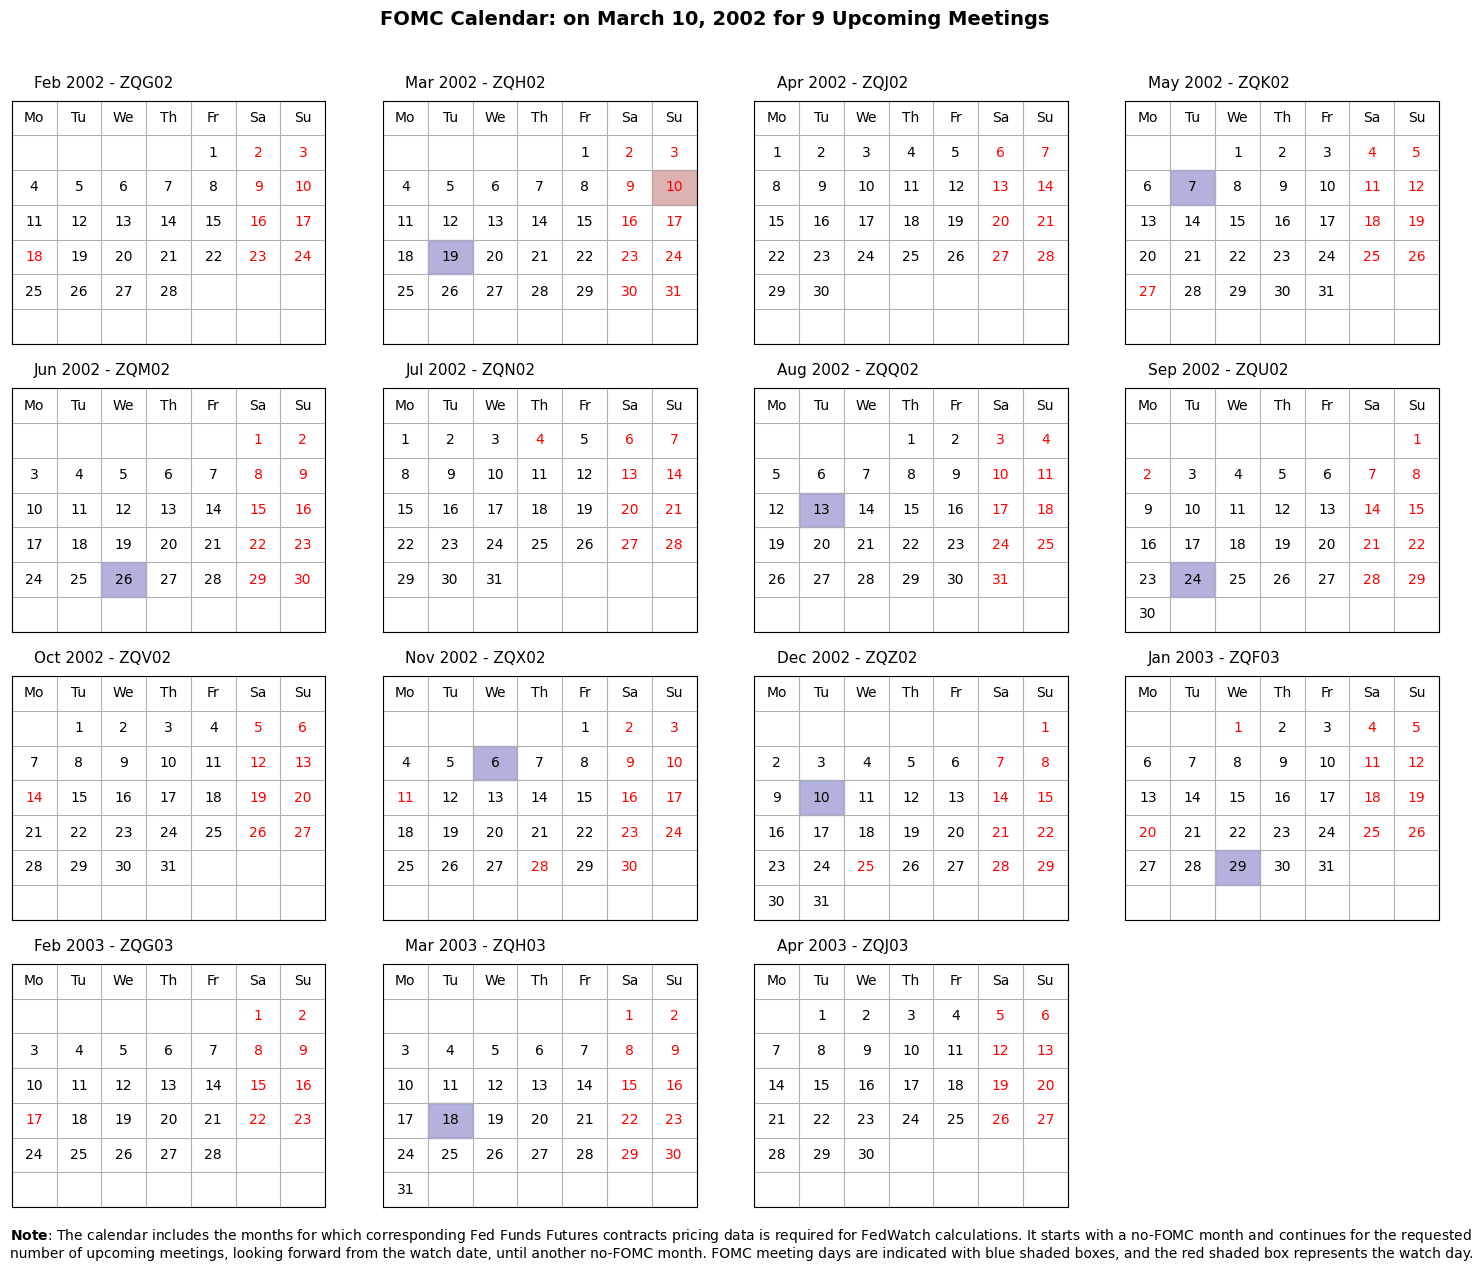

In [23]:
# Plot FOMC calendar
fig = fomc.plot_fomc_calendar()

In [24]:
# Calculate rate expectations
fedwatch3 = fw.fedwatch.FedWatch(watch_date = '2002-01-01',
                                fomc_dates = fomc_dates_2,
                                num_upcoming = 5,
                                user_func = read_price_history,
                                path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
t3 = fedwatch3.generate_hike_info(rate_cols=True)
t3

1.50      1.75      2.00      2.25      2.50  \
WatchDate  FOMCDate                                                       
2002-01-01 2002-01-30  0.320690  0.679310  0.000000  0.000000  0.000000   
           2002-03-19  0.314276  0.672138  0.013586  0.000000  0.000000   
           2002-05-07  0.059084  0.381554  0.548330  0.011032  0.000000   
           2002-06-26  0.013707  0.133897  0.420246  0.423677  0.008473   
           2002-08-13  0.000000  0.013707  0.133897  0.420246  0.423677   

                           2.75          3.00  
WatchDate  FOMCDate                            
2002-01-01 2002-01-30  0.000000  0.000000e+00  
           2002-03-19  0.000000  0.000000e+00  
           2002-05-07  0.000000  0.000000e+00  
           2002-06-26  0.000000  0.000000e+00  
           2002-08-13  0.008473  4.816102e-16

In [25]:
# Calculate rate expectations
fedwatch = fw.fedwatch.FedWatch(watch_date = '2002-02-01',
                                fomc_dates = fomc_dates_2,
                                num_upcoming = 5,
                                user_func = read_price_history,
                                path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
t1 = fedwatch.generate_hike_info(rate_cols=True)
t1

1.75      2.00      2.25      2.50      2.75  \
WatchDate  FOMCDate                                                       
2002-02-01 2002-03-19  0.000000  0.000000  0.000000  0.000000  0.000000   
           2002-05-07  0.464000  0.536000  0.000000  0.000000  0.000000   
           2002-06-26  0.118784  0.482432  0.398784  0.000000  0.000000   
           2002-08-13  0.035325  0.226930  0.457556  0.280189  0.000000   
           2002-09-24  0.000000  0.034711  0.223598  0.453545  0.283274   

                           3.00  
WatchDate  FOMCDate              
2002-02-01 2002-03-19  0.000000  
           2002-05-07  0.000000  
           2002-06-26  0.000000  
           2002-08-13  0.000000  
           2002-09-24  0.004873

In [26]:
# fedwatch2 = fw.fedwatch.FedWatch(watch_date = '2008-01-01',
#                                 fomc_dates = fomc_dates_2,
#                                 num_upcoming = 13,
#                                 user_func = read_price_history,
#                                 path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
# t2 = fedwatch2.generate_hike_info(rate_cols=True)
# t2

In [27]:
# fedwatch2 = fw.fedwatch.FedWatch(watch_date = '2019-01-30',
#                                 fomc_dates = fomc_dates_2,
#                                 num_upcoming = 10,
#                                 user_func = read_price_history,
#                                 path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
# t3 = fedwatch2.generate_hike_info(rate_cols=True)
# t3

In [28]:
# df_reset = t2.reset_index()

# # Now, drop the 'WatchDate' column since it's no longer part of the index but a regular column
# df_dropped = df_reset.drop('WatchDate', axis=1)

# # Optionally, set 'FOMCDate' as the new index if that's your desired structure
# df_final = df_dropped.set_index('FOMCDate')


In [29]:
# t2.columns

#######################################################################

### Since we know the watch date affects the probability range, lets take the predictions from 3months prior the date and a month prior. 

# First lets get them with 3 months lag

In [30]:
# import pandas as pd

# # Initialize variables
# three_months = pd.DataFrame()  # DataFrame to hold aggregated results

# # Iterate through each FOMC meeting date in your list
# for meeting_date in fomc_dates_2:
#     # Set watch_date to be three months prior to the meeting date
#     watch_date = (pd.to_datetime(meeting_date) - pd.DateOffset(months=3)).strftime('%Y-%m-%d')
    
#     # Initialize FedWatch with the current watch_date
#     fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
#                                     fomc_dates=fomc_dates_2,
#                                     num_upcoming=4,  # Assuming you want predictions for the next 4 meetings from the watch date
#                                     user_func=read_price_history,
#                                     path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
#     try:
#         # Generate hike info for the watch date set 3 months prior to the FOMC meeting
#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
#         # Append the current batch's results to the aggregated DataFrame
#         three_months = pd.concat([three_months, current_batch_df])
#     except Exception as e:
#         print(f"Error generating hike info for watch date {watch_date}: {e}")

# # Print or save three_months as needed
# print(three_months)


In [31]:
# import pandas as pd

# # Convert FOMC dates to datetime objects for easier manipulation
# fomc_dates_datetime = pd.to_datetime(fomc_dates_2)

# # Initialize DataFrame to hold aggregated results
# three_months = pd.DataFrame()

# # Iterate through each FOMC meeting date
# for meeting_date in fomc_dates_datetime:
#     # Calculate watch_date as three months prior to the meeting date
#     watch_date = meeting_date - pd.DateOffset(months=3)

#     # Ensure watch_date falls within the range of available data
#     if watch_date < fomc_dates_datetime.min():
#         print(f"Watch date {watch_date.strftime('%Y-%m-%d')} falls outside the range of available FOMC data. Skipping.")
#         continue

#     try:
#         # Initialize FedWatch with the calculated watch_date
#         # Note: You'll need to adjust this to match your actual FedWatch initialization and data fetching logic
#         fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date.strftime('%Y-%m-%d'),
#                                         fomc_dates=fomc_dates_2,
#                                         num_upcoming=4,  # Example value, adjust as needed
#                                         user_func=read_price_history,
#                                         path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')

#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
#         three_months = pd.concat([three_months, current_batch_df])
#     except Exception as e:
#         print(f"Error generating hike info for watch_date {watch_date.strftime('%Y-%m-%d')}: {e}")
#         # Optionally, continue to the next date instead of stopping
#         continue

# # Check if data was successfully fetched
# if three_months.empty:
#     print("No data was successfully fetched.")
# else:
#     print(three_months)


In [32]:
# three_months.tail(10)

In [33]:
# import pandas as pd

# # Initialize variables
# watch_date = '2005-01-01'
# three_months_2 = pd.DataFrame()  # DataFrame to hold aggregated results
# continue_loop = True

# while continue_loop:
#     # Initialize FedWatch with the current watch_date
#     fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
#                                     fomc_dates=fomc_dates_2,
#                                     num_upcoming=4,
#                                     user_func=read_price_history,
#                                     path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
#     # Try to generate hike info for the current batch, handle exceptions for empty or invalid data
#     try:
#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
#     except Exception as e:
#         print(f"Error generating hike info: {e}")
#         continue_loop = False
#         break

#     # Check if the DataFrame is not empty
#     if not current_batch_df.empty:
#         # Append the current batch's results to the aggregated DataFrame
#         three_months_2 = pd.concat([three_months_2, current_batch_df])

#         # Check if the current batch is less than 15, indicating we've fetched all available meetings
#         if len(current_batch_df) < 4:
#             continue_loop = False
#         else:
#             # Convert the last FOMCDate from the batch to datetime, add one day, and update watch_date
#             last_meeting_date = pd.to_datetime(current_batch_df.index.get_level_values('FOMCDate')[-1])
#             watch_date = (last_meeting_date + pd.Timedelta(days=1)).strftime('%Y-%m-%d')
#     else:
#         # If the current batch is empty, stop the loop
#         continue_loop = False



In [34]:
# three_months_2

#######################################################

In [35]:
# import pandas as pd

# # Initialize variables
# watch_date = '2000-01-01'
# three_months_3 = pd.DataFrame()  # DataFrame to hold aggregated results
# continue_loop = True

# while continue_loop:
#     # Initialize FedWatch with the current watch_date
#     fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
#                                     fomc_dates=fomc_dates_2,
#                                     num_upcoming=4,
#                                     user_func=read_price_history,
#                                     path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
#     # Try to generate hike info for the current batch, handle exceptions for empty or invalid data
#     try:
#         current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
#     except Exception as e:
#         print(f"Error generating hike info: {e}")
#         continue_loop = False
#         break

#     # Check if the DataFrame is not empty
#     if not current_batch_df.empty:
#         # Append the current batch's results to the aggregated DataFrame
#         three_months_3 = pd.concat([three_months_3, current_batch_df])

#         # Check if the current batch is less than 15, indicating we've fetched all available meetings
#         if len(current_batch_df) < 4:
#             continue_loop = False
#         else:
#             # Increment watch_date by four months, starting from the first day of the next month
#             watch_date_dt = pd.to_datetime(watch_date)
#             # Calculate the first day of the next month
#             next_month = (watch_date_dt + pd.DateOffset(months=1)).replace(day=1)
#             # Add three more months to get to the next watch_date, ensuring it starts from the first day of the month
#             watch_date = (next_month + pd.DateOffset(months=3)).strftime('%Y-%m-%d')
#     else:
#         # If the current batch is empty, stop the loop
#         continue_loop = False


In [36]:
# three_months_3

In [37]:
# df = three_months_3.reset_index()

# # Now, drop the 'WatchDate' column since it's no longer part of the index but a regular column
# df_dropped = df.drop('WatchDate', axis=1)

# # Optionally, set 'FOMCDate' as the new index if that's your desired structure
# df_final = df_dropped.set_index('FOMCDate')

########################################################################

In [38]:
import pandas as pd

# Initialize variables
watch_date = '2000-01-01'
three_months_4 = pd.DataFrame()  # DataFrame to hold aggregated results
continue_loop = True
while continue_loop:
    # Initialize FedWatch with the current watch_date
    fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
                                    fomc_dates=fomc_dates_2,
                                    num_upcoming=4,
                                    user_func=read_price_history,
                                    path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
    # Try to generate hike info for the current batch, handle exceptions for empty or invalid data
    try:
        current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
    except Exception as e:
        print(f"Error generating hike info: {e}")
        continue_loop = False
        break

    # Check if the DataFrame is not empty
    if not current_batch_df.empty:
        # Append the current batch's results to the aggregated DataFrame
        three_months_4 = pd.concat([three_months_4, current_batch_df])

        # Regardless of the number of dates fetched, proceed to increment watch_date by four months
        watch_date_dt = pd.to_datetime(watch_date)
        next_month = (watch_date_dt + pd.DateOffset(months=1)).replace(day=1)
        watch_date = (next_month + pd.DateOffset(months=3)).strftime('%Y-%m-%d')

    else:
        # If the current batch is empty, stop the loop
        continue_loop = False


Error generating hike info: Unable to get target rate limits from FRED database, please provide (ll, ul) for "watch_rate_range" or try again.


In [39]:
three_months_4

5.75      6.00      6.25      6.50      6.75  7.00  \
WatchDate  FOMCDate                                                             
2000-01-01 2000-02-02  0.644000  0.356000  0.000000  0.000000  0.000000   NaN   
           2000-03-21  0.164864  0.570272  0.264864  0.000000  0.000000   NaN   
           2000-05-16  0.033706  0.247747  0.507833  0.210714  0.000000   NaN   
           2000-06-28  0.025466  0.195426  0.444257  0.283343  0.051508   NaN   
2000-05-01 2000-05-16       NaN       NaN  0.446667  0.553333  0.000000   0.0   
...                         ...       ...       ...       ...       ...   ...   
2023-09-01 2024-01-31       NaN       NaN       NaN       NaN       NaN   NaN   
2024-01-01 2024-01-31       NaN       NaN       NaN       NaN       NaN   NaN   
           2024-03-20       NaN       NaN       NaN       NaN       NaN   NaN   
           2024-05-01       NaN       NaN       NaN       NaN       NaN   NaN   
           2024-06-12       NaN       NaN       NaN       NaN       NaN   NaN   

                       7.25  5.00  5.25  5.50  ...  3.50-3.75  3.75-4.00  \
WatchDate  FOMCDate                            ...                         
2000-01-01 2000-02-02   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2000-03-21   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2000-05-16   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2000-06-28   NaN   NaN   NaN   NaN  ...        NaN        NaN   
2000-05-01 2000-05-16   0.0   NaN   NaN   NaN  ...        NaN        NaN   
...                     ...   ...   ...   ...  ...        ...        ...   
2023-09-01 2024-01-31   NaN   NaN   NaN   NaN  ...        NaN        NaN   
2024-01-01 2024-01-31   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2024-03-20   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2024-05-01   NaN   NaN   NaN   NaN  ...        NaN        NaN   
           2024-06-12   NaN   NaN   NaN   NaN  ...        NaN        NaN   

                       4.00-4.25  4.25-4.50  4.50-4.75  4.75-5.00  5.00-5.25  \
WatchDate  FOMCDate                                                            
2000-01-01 2000-02-02        NaN        NaN        NaN        NaN        NaN   
           2000-03-21        NaN        NaN        NaN        NaN        NaN   
           2000-05-16        NaN        NaN        NaN        NaN        NaN   
           2000-06-28        NaN        NaN        NaN        NaN        NaN   
2000-05-01 2000-05-16        NaN        NaN        NaN        NaN        NaN   
...                          ...        ...        ...        ...        ...   
2023-09-01 2024-01-31        NaN        NaN        NaN   0.011496   0.172105   
2024-01-01 2024-01-31        NaN   0.000000   0.000000   0.000000   0.062000   
           2024-03-20        NaN   0.000000   0.000000   0.013640   0.254720   
           2024-05-01        NaN   0.000000   0.004730   0.097244   0.420110   
           2024-06-12        NaN   0.002339   0.050482   0.256916   0.448698   

                       5.25-5.50  5.50-5.75  5.75-6.00  
WatchDate  FOMCDate                                     
2000-01-01 2000-02-02        NaN        NaN        NaN  
           2000-03-21        NaN        NaN        NaN  
           2000-05-16        NaN        NaN        NaN  
           2000-06-28        NaN        NaN        NaN  
2000-05-01 2000-05-16        NaN        NaN        NaN  
...                          ...        ...        ...  
2023-09-01 2024-01-31   0.554908   0.247885   0.013606  
2024-01-01 2024-01-31   0.938000        NaN        NaN  
           2024-03-20   0.731640        NaN        NaN  
           2024-05-01   0.477916        NaN        NaN  
           2024-06-12   0.241565        NaN        NaN  

[292 rows x 56 columns]

In [40]:
df_4_reset = three_months_4.reset_index()


# Now, drop the 'WatchDate' column since it's no longer part of the index but a regular column
df_4_dropped = df_4_reset.drop('WatchDate', axis=1)

# Optionally, set 'FOMCDate' as the new index if that's your desired structure
df_4_final = df_4_dropped.set_index('FOMCDate')


In [41]:
df_4_final

,5.75,6.00,6.25,6.50,6.75,7.00,7.25,5.00,5.25,5.50,...,3.50-3.75,3.75-4.00,4.00-4.25,4.25-4.50,4.50-4.75,4.75-5.00,5.00-5.25,5.25-5.50,5.50-5.75,5.75-6.00
FOMCDate,,,,,,,,,,,,,,,,,,,,,
2000-02-02,0.644000,0.356000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-21,0.164864,0.570272,0.264864,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-16,0.033706,0.247747,0.507833,0.210714,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-28,0.025466,0.195426,0.444257,0.283343,0.051508,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-16,NaN,NaN,0.446667,0.553333,0.000000,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.011496,0.172105,0.554908,0.247885,0.013606
2024-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.062000,0.938000,NaN,NaN
2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,0.013640,0.254720,0.731640,NaN,NaN


In [42]:
df_4_final.columns

Index(['5.75', '6.00', '6.25', '6.50', '6.75', '7.00', '7.25', '5.00', '5.25',
       '5.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.25', '3.50', '3.75',
       '4.00', '3.00', '1.50', '1.00', '1.25', '0.75', '0.50', '4.25', '4.50',
       '4.75', '0.00-0.25', '0.25-0.50', '0.50-0.75', '0.75-1.00', '1.00-1.25',
       '-0.25-0.00', '-0.50--0.25', '-0.75--0.50', '1.25-1.50', '1.50-1.75',
       '1.75-2.00', '2.00-2.25', '2.25-2.50', '2.50-2.75', '2.75-3.00',
       '-1.00--0.75', '3.00-3.25', '3.25-3.50', '3.50-3.75', '3.75-4.00',
       '4.00-4.25', '4.25-4.50', '4.50-4.75', '4.75-5.00', '5.00-5.25',
       '5.25-5.50', '5.50-5.75', '5.75-6.00'],
      dtype='object')

In [43]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with the columns listed

# First, ensure that all range columns exist and are initialized properly.
# If any range columns don't exist, you can create them with default values (e.g., 0 or NaN)
# For this example, let's assume all range columns exist and are initialized.

# Map specific rate columns to their range columns
# This is a simplified example. Expand this mapping as needed.
column_mappings = {
    '0.50':'0.50-0.75',
    '0.75':'0.75-1.00',
    '1.00':'1.00-1.25',
    '1.25':'1.25-1.50',
    '1.75':'1.75-2.00', 
    '2.00':'2.00-2.25',
    '2.25':'2.25-2.50',
    '2.50':'2.50-2.75',
    '2.75':'2.75-3.00',
    '3.25':'3.25-3.50',
    '3.50':'3.50-3.75',
    '3.75':'3.75-4.00',
    '4.00':'4.00-4.25',
    '4.25':'4.25-4.50',
    '4.50':'4.50-4.75',
    '4.75':'4.75-5.00',
    '5.00': '5.00-5.25',
    '5.25': '5.25-5.50',
    '5.25':'5.25-5.50',
    '5.50':'5.50-5.75',
    '6.00':'6.00-6.25',
    '6.25':'6.25-6.50',
    '6.50':'6.50-6.75',
    '6.75':'6.75-7.00',
    '7.00':'7.00-7.25',
    '7.25':'7.25-7.50'
}

# Iterate over the mapping and aggregate values
for src_col, dest_col in column_mappings.items():
    # Check if the destination column exists, if not, create it
    if dest_col not in df.columns:
        df_4_final[dest_col] = 0  # or np.nan, depending on how you want to initialize it

    # Aggregate the source column into the destination column, handling NaN values
    # Ensure both src_col and the next rate that belongs to the range are included
    # This example only shows direct mapping; you might sum multiple columns for a single range
    df_4_final[dest_col] = df_4_final[dest_col].fillna(0) + df_4_final[src_col].fillna(0)

# After processing, you may want to drop the original rate columns if they are no longer needed
df_4_final.drop(columns=['5.75', '6.00', '6.25', '6.50', '6.75', '7.00', '7.25', '5.00', '5.25',
       '5.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.25', '3.50', '3.75',
       '4.00', '3.00', '1.50', '1.00', '1.25', '0.75', '0.50', '4.25', '4.50',
       '4.75'], inplace=True)


In [44]:
df_4_final

,0.00-0.25,0.25-0.50,0.50-0.75,0.75-1.00,1.00-1.25,-0.25-0.00,-0.50--0.25,-0.75--0.50,1.25-1.50,1.50-1.75,...,5.00-5.25,5.25-5.50,5.50-5.75,5.75-6.00,6.00-6.25,6.25-6.50,6.50-6.75,6.75-7.00,7.00-7.25,7.25-7.50
FOMCDate,,,,,,,,,,,,,,,,,,,,,
2000-02-02,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,0.356000,0.000000,0.000000,0.000000,0.0,0.0
2000-03-21,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,0.570272,0.264864,0.000000,0.000000,0.0,0.0
2000-05-16,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,0.247747,0.507833,0.210714,0.000000,0.0,0.0
2000-06-28,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,0.195426,0.444257,0.283343,0.051508,0.0,0.0
2000-05-16,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,0.000000,0.446667,0.553333,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.013606,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2024-01-31,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2024-03-20,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0


#############################################################2#############################################################################################

In [45]:
import pandas as pd

# Initialize variables
watch_date = '1990-01-01'
three_months_5 = pd.DataFrame()  # DataFrame to hold aggregated results
continue_loop = True
while continue_loop:
    # Initialize FedWatch with the current watch_date
    fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
                                    fomc_dates=fomc_dates_2,
                                    num_upcoming=2,
                                    user_func=read_price_history,
                                    path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
    # Try to generate hike info for the current batch, handle exceptions for empty or invalid data
    try:
        current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
    except Exception as e:
        print(f"Error generating hike info: {e}")
        continue_loop = False
        break

    # Check if the DataFrame is not empty
    if not current_batch_df.empty:
        # Append the current batch's results to the aggregated DataFrame
        three_months_5 = pd.concat([three_months_5, current_batch_df])

        # Regardless of the number of dates fetched, proceed to increment watch_date by four months
        watch_date_dt = pd.to_datetime(watch_date)
        next_month = (watch_date_dt + pd.DateOffset(months=1)).replace(day=1)
        watch_date = (next_month + pd.DateOffset(months=3)).strftime('%Y-%m-%d')

    else:
        # If the current batch is empty, stop the loop
        continue_loop = False


Error generating hike info: Unable to get target rate limits from FRED database, please provide (ll, ul) for "watch_rate_range" or try again.


In [46]:
df_5_final = three_months_5.reset_index()
df_5_final

,WatchDate,FOMCDate,7.75,8.00,8.25,8.50,8.75,9.00,6.50,6.75,...,2.75-3.00,3.00-3.25,3.25-3.50,3.50-3.75,4.50-4.75,4.75-5.00,5.00-5.25,5.25-5.50,5.50-5.75,5.75-6.00
0,1990-01-01,1990-02-07,0.000000,0.690769,0.309231,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,1990-03-27,0.296499,0.527001,0.176499,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-05-01,1990-05-15,NaN,NaN,NaN,0.92000,0.08000,0.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-05-01,1990-07-03,NaN,NaN,NaN,0.30544,0.64112,0.05344,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-09-01,1990-10-02,0.647059,0.352941,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2023-05-01,2023-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.048091,0.675018,0.276891,NaN,NaN
202,2023-09-01,2023-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.940000,0.060000,0.000000
203,2023-09-01,2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645989,0.335244,0.018767
204,2024-01-01,2024-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.062000,0.938000,NaN,NaN


In [47]:


# # Now, drop the 'WatchDate' column since it's no longer part of the index but a regular column
# df_5_dropped = df_5_reset.drop('WatchDate', axis=1)

# # Optionally, set 'FOMCDate' as the new index if that's your desired structure
# df_5_final = df_5_dropped.set_index('FOMCDate')


In [48]:
df_5_final.columns

Index(['WatchDate', 'FOMCDate', '7.75', '8.00', '8.25', '8.50', '8.75', '9.00',
       '6.50', '6.75', '7.00', '5.50', '5.75', '6.00', '4.00', '4.25', '5.25',
       '3.75', '3.50', '3.00', '3.25', '2.75', '4.50', '4.75', '5.00', '6.25',
       '1.50', '1.75', '2.00', '2.25', '1.25', '0.75', '1.00', '2.50',
       '0.00-0.25', '0.25-0.50', '0.50-0.75', '-0.25-0.00', '-0.50--0.25',
       '0.75-1.00', '1.00-1.25', '1.25-1.50', '1.50-1.75', '1.75-2.00',
       '2.00-2.25', '2.25-2.50', '2.50-2.75', '2.75-3.00', '3.00-3.25',
       '3.25-3.50', '3.50-3.75', '4.50-4.75', '4.75-5.00', '5.00-5.25',
       '5.25-5.50', '5.50-5.75', '5.75-6.00'],
      dtype='object')

In [49]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with the columns listed

# First, ensure that all range columns exist and are initialized properly.
# If any range columns don't exist, you can create them with default values (e.g., 0 or NaN)
# For this example, let's assume all range columns exist and are initialized.

# Map specific rate columns to their range columns
# This is a simplified example. Expand this mapping as needed.
column_mappings = {
    '0.75':'0.75-1.00',
    '1.00':'1.00-1.25',
    '1.25':'1.25-1.50',
    '1.75':'1.75-2.00', 
    '2.00':'2.00-2.25',
    '2.25':'2.25-2.50',
    '2.50':'2.50-2.75',
    '2.75':'2.75-3.00',
    '3.25':'3.25-3.50',
    '3.50':'3.50-3.75',
    '3.75':'3.75-4.00',
    '4.00':'4.00-4.25',
    '4.25':'4.25-4.50',
    '4.50':'4.50-4.75',
    '4.75':'4.75-5.00',
    '5.00': '5.00-5.25',
    '5.25': '5.25-5.50',
    '5.50':'5.50-5.75',
    '6.00':'6.00-6.25',
    '6.25':'6.25-6.50',
    '6.50':'6.50-6.75',
    '6.75':'6.75-7.00',
    '7.00':'7.00-7.25',
    '7.75':'7.75-8.00',
    '8.00':'8.00-8.25',
    '8.25':'8.25-8.50',
    '8.50':'8.50-8.75',
    '8.75':'8.75-9.00',
    '9.00':'9.00-9.25'
}

# Iterate over the mapping and aggregate values
for src_col, dest_col in column_mappings.items():
    # Check if the destination column exists, if not, create it
    if dest_col not in df_5_final.columns:
        df_5_final[dest_col] = 0  # or np.nan, depending on how you want to initialize it

    # Aggregate the source column into the destination column, handling NaN values
    # Ensure both src_col and the next rate that belongs to the range are included
    # This example only shows direct mapping; you might sum multiple columns for a single range
    df_5_final[dest_col] = df_5_final[dest_col].fillna(0) + df_5_final[src_col].fillna(0)

# After processing, you may want to drop the original rate columns if they are no longer needed
df_5_final.drop(columns=['7.75', '8.00', '8.25', '8.50', '8.75', '9.00', '6.50', '6.75', '7.00',
       '5.50', '5.75', '6.00', '4.00', '4.25', '5.25', '3.75', '3.50', '3.00',
       '3.25', '2.75', '4.50', '4.75', '5.00', '6.25', '1.50', '1.75', '2.00',
       '2.25', '1.25', '0.75', '1.00', '2.50'], inplace=True)


In [50]:
df_5_final.head(5)

,WatchDate,FOMCDate,0.00-0.25,0.25-0.50,0.50-0.75,-0.25-0.00,-0.50--0.25,0.75-1.00,1.00-1.25,1.25-1.50,...,6.25-6.50,6.50-6.75,6.75-7.00,7.00-7.25,7.75-8.00,8.00-8.25,8.25-8.50,8.50-8.75,8.75-9.00,9.00-9.25
0,1990-01-01,1990-02-07,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.690769,0.309231,0.00000,0.00000,0.00000
1,1990-01-01,1990-03-27,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.296499,0.527001,0.176499,0.00000,0.00000,0.00000
2,1990-05-01,1990-05-15,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.92000,0.08000,0.00000
3,1990-05-01,1990-07-03,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.30544,0.64112,0.05344
4,1990-09-01,1990-10-02,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.647059,0.352941,0.000000,0.00000,0.00000,0.00000


In [51]:
len(df_5_final)

206

In [52]:
df_5_final.head(10)

,WatchDate,FOMCDate,0.00-0.25,0.25-0.50,0.50-0.75,-0.25-0.00,-0.50--0.25,0.75-1.00,1.00-1.25,1.25-1.50,...,6.25-6.50,6.50-6.75,6.75-7.00,7.00-7.25,7.75-8.00,8.00-8.25,8.25-8.50,8.50-8.75,8.75-9.00,9.00-9.25
0,1990-01-01,1990-02-07,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.690769,0.309231,0.00000,0.00000,0.00000
1,1990-01-01,1990-03-27,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.296499,0.527001,0.176499,0.00000,0.00000,0.00000
2,1990-05-01,1990-05-15,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.92000,0.08000,0.00000
3,1990-05-01,1990-07-03,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30544,0.64112,0.05344
4,1990-09-01,1990-10-02,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.647059,0.352941,0.000000,0.00000,0.00000,0.00000
5,1990-09-01,1990-11-13,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.380623,0.474048,0.145329,0.00000,0.00000,0.00000
6,1991-01-01,1991-02-06,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.000000,0.572800,0.427200,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
7,1991-01-01,1991-03-26,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.198876,0.522248,0.278876,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
8,1991-05-01,1991-05-14,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
9,1991-05-01,1991-07-03,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000


In [53]:
df_5_final.to_csv('final_pyfed.csv', index=False)

In [54]:
# import pandas as pd
# import numpy as np

# # Assuming df is your DataFrame with the columns listed

# # First, ensure that all range columns exist and are initialized properly.
# # If any range columns don't exist, you can create them with default values (e.g., 0 or NaN)
# # For this example, let's assume all range columns exist and are initialized.

# # Map specific rate columns to their range columns
# # This is a simplified example. Expand this mapping as needed.
# column_mappings = {
#     '0.50':'0.50-0.75',
#     '0.75':'0.75-1.00',
#     '1.00':'1.00-1.25',
#     '1.25':'1.25-1.50',
#     '1.75':'1.75-2.00', 
#     '2.00':'2.00-2.25',
#     '2.25':'2.25-2.50',
#     '2.50':'2.50-2.75',
#     '2.75':'2.75-3.00',
#     '3.25':'3.25-3.50',
#     '3.50':'3.50-3.75',
#     '3.75':'3.75-4.00',
#     '4.00':'4.00-4.25',
#     '4.25':'4.25-4.50',
#     '4.50':'4.50-4.75',
#     '4.75':'4.75-5.00',
#     '5.00': '5.00-5.25',
#     '5.25': '5.25-5.50',
#     '5.50':'5.50-5.75',
#     '6.00':'6.00-6.25',
#     '6.25':'6.25-6.50',
#     '6.50':'6.50-6.75',
#     '6.75':'6.75-7.00',
#     '7.00':'7.00-7.25',
#     '7.25':'7.25-7.50',
#     '7.75':'7.75-8.00',
#     '8.00':'8.00-8.25',
#     '8.25':'8.25-8.50',
#     '8.50':'8.50-8.75',
#     '8.75':'8.75-9.00',
#     '9.00':'9.00-9.25'
# }

# # Iterate over the mapping and aggregate values
# for src_col, dest_col in column_mappings.items():
#     # Check if the destination column exists, if not, create it
#     if dest_col not in df.columns:
#         df_5_final[dest_col] = 0  # or np.nan, depending on how you want to initialize it

#     # Aggregate the source column into the destination column, handling NaN values
#     # Ensure both src_col and the next rate that belongs to the range are included
#     # This example only shows direct mapping; you might sum multiple columns for a single range
#     df_5_final[dest_col] = df_5_final[dest_col].fillna(0) + df_5_final[src_col].fillna(0)

# # After processing, you may want to drop the original rate columns if they are no longer needed
# df_5_final.drop(columns=['7.75', '8.00', '8.25', '8.50', '8.75', '9.00', '6.50', '6.75', '7.00',
#        '5.50', '5.75', '6.00', '4.00', '4.25', '5.25', '3.75', '3.50', '3.00',
#        '3.25', '2.75', '4.50', '4.75', '5.00', '6.25', '1.50', '1.75', '2.00',
#        '2.25', '1.25', '0.75', '1.00',], inplace=True)
